In [129]:
import pandas as pd
import joblib
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split, StratifiedKFold
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


Sample code used: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#1.-Introduction-to-Decision-Tree-algorithm-

In [130]:
data_path = '/Users/andreslopez/Desktop/ECE3039/Project/survey _lung_cancer.csv'

df = pd.read_csv(data_path)

In [131]:
df.shape
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [132]:
xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).applymap(lambda x: 'NO' if x == 1 else 'YES')
xvar = df[['AGE']]
xvalue = pd.concat([df['GENDER'],xvalue], axis=1)
x_label = pd.concat([df['AGE'],xvalue], axis=1)
x_label = x_label.columns
xvalue = pd.get_dummies(xvalue)
X = pd.concat([xvar,xvalue], axis=1)
X = X.astype(int)
y = df['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)

/var/folders/wh/5rf3n2rs4875gpzdn9xgsbnw0000gn/T/ipykernel_41178/4160642664.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).applymap(lambda x: 'NO' if x == 1 else 'YES')


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Hyper-parameter Optimization

In [134]:
clf_gini = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': list(range(2, 20)),
    'criterion': ["gini", "entropy", "log_loss"],
              }
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=84)
grid_search = GridSearchCV(estimator= clf_gini,param_grid=param_grid, cv = 5, scoring = 'accuracy' )

grid_search.fit(X_train, y_train)
optimized_model = grid_search.best_estimator_

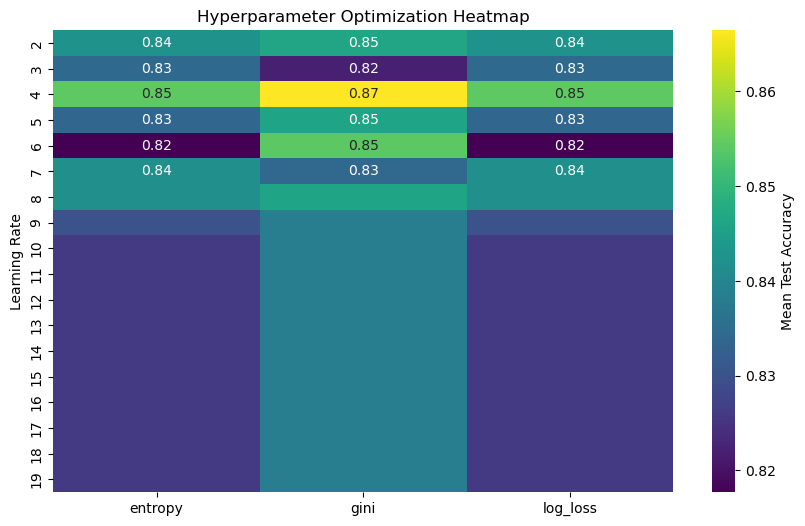

In [135]:
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
heatmap_data = results.pivot_table(index='param_max_depth', columns='param_criterion', values='mean_test_score', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar_kws={'label': 'Mean Test Accuracy'})
plt.title('Hyperparameter Optimization Heatmap')
plt.xlabel('')
plt.ylabel('Learning Rate')
plt.show()

In [136]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Cross-validation accuracy:", grid_search.best_score_)
print(f'Training set score: {optimized_model.score(X_train, y_train)}')
print(f'Test set score: {optimized_model.score(X_test, y_test)}')

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4}
Cross-validation accuracy: 0.8664489795918368
Training set score: 0.902834008097166
Test set score: 0.9354838709677419


### Final Decision Tree

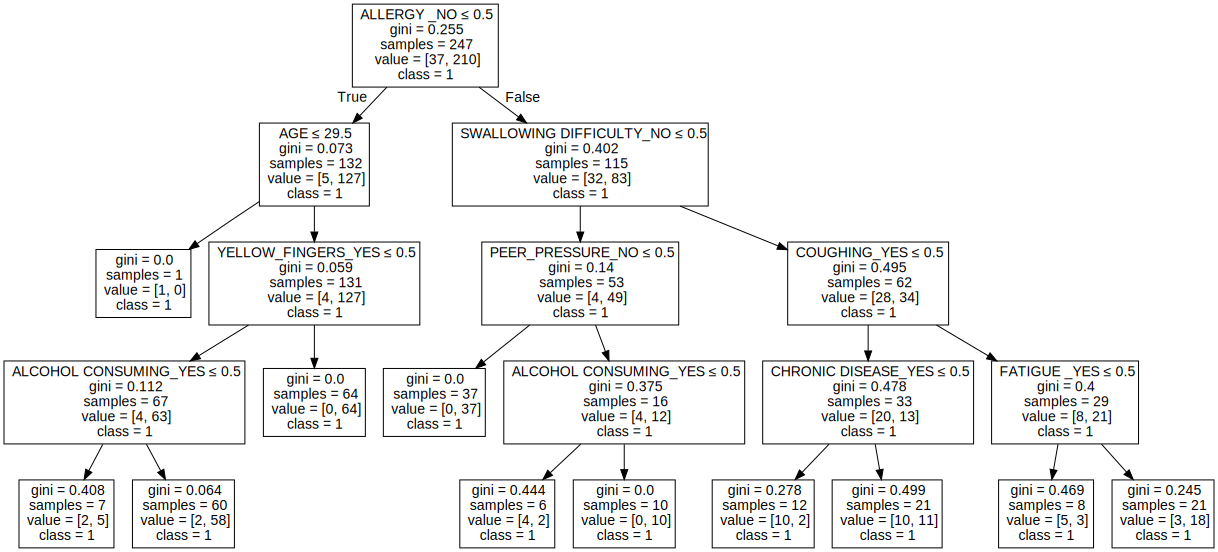

In [137]:
optimized_model.fit(X_train,y_train)
 
dot_data = tree.export_graphviz(optimized_model, out_file=None, 
                              feature_names=X_train.columns,
                              class_names=y_train.astype(str),
                              special_characters=True)

graph = graphviz.Source(dot_data)
graph

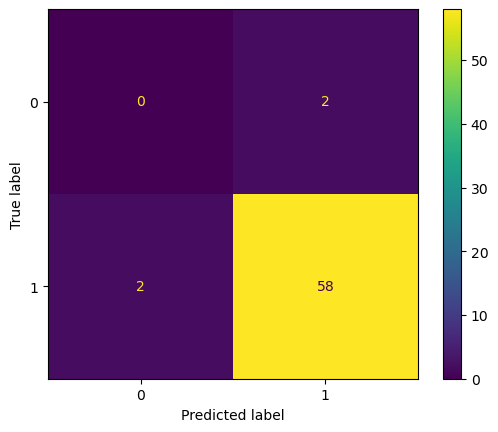


Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1_score: 0.9666666666666667


In [140]:
y_pred = optimized_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show()

print(f'\nPrecision: {precision}')
print(f'Recall: {recall}')
print(f"F1_score: {f1}")

In [139]:
joblib.dump(optimized_model, 'xgboosting_model.pkl')

['xgboosting_model.pkl']